In [18]:
import arviz as az
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pymc as pm
import bambi as bmb
import seaborn as sns

# Applied Exercises

In [2]:
penguins = pd.read_csv('penguins_size.csv')
penguins.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


Goal of this *set* of exercises is to predict body_mass_g.   

In [4]:
len(penguins)

344

In [6]:
np.sum(penguins.isna().any(axis=1))

10

There are 10 rows with missinig values, lets look at them

In [7]:
penguins[penguins.isna().any(axis=1)]

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
8,Adelie,Torgersen,34.1,18.1,193.0,3475.0,NaN
9,Adelie,Torgersen,42.0,20.2,190.0,4250.0,NaN
10,Adelie,Torgersen,37.8,17.1,186.0,3300.0,NaN
11,Adelie,Torgersen,37.8,17.3,180.0,3700.0,NaN
47,Adelie,Dream,37.5,18.9,179.0,2975.0,NaN
246,Gentoo,Biscoe,44.5,14.3,216.0,4100.0,NaN
286,Gentoo,Biscoe,46.2,14.4,214.0,4650.0,NaN
324,Gentoo,Biscoe,47.3,13.8,216.0,4725.0,NaN
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN


The exercises do not look at sex as a predictor so I will not worry about the NaN's in that column, but will drop out the row 3 and 339. We will also drop sex and island, as they are not being used for this exercise.

In [14]:
penguins_clean = penguins[penguins['culmen_length_mm'].notna()]
penguins_clean = penguins_clean.drop(columns = ["island", "sex"])
penguins_clean.head()

,species,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
0,Adelie,39.1,18.7,181.0,3750.0
1,Adelie,39.5,17.4,186.0,3800.0
2,Adelie,40.3,18.0,195.0,3250.0
4,Adelie,36.7,19.3,193.0,3450.0
5,Adelie,39.3,20.6,190.0,3650.0


In [25]:
penguins_clean.describe()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


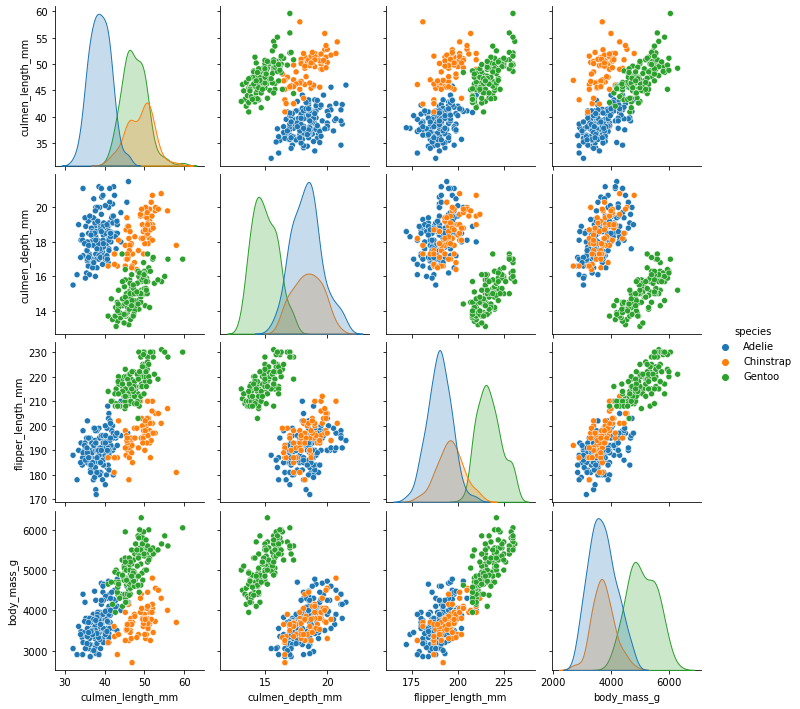

In [20]:
sns.pairplot(penguins_clean, hue = "species")

From this pair plot it seems that flipper length does a great job of predicting body mass by itself!  but we will see what happens

## Exercise 10.10 Penguins! Main effects.
Let’s begin our analysis of penguin body_mass_g by exploring its relationship with flipper_length_mm and species.

a) plots, done above.

b) Do a normal regression MCMC (I will use bambi and its default priors)

c) investigate diagnostics

d) summarize results (az.summary) and intepret non-interecept coefficients.

e) Simulate, plot, and describe the posterior predictive model for the body mass of an Adelie penguin that has a flipper length of 197.

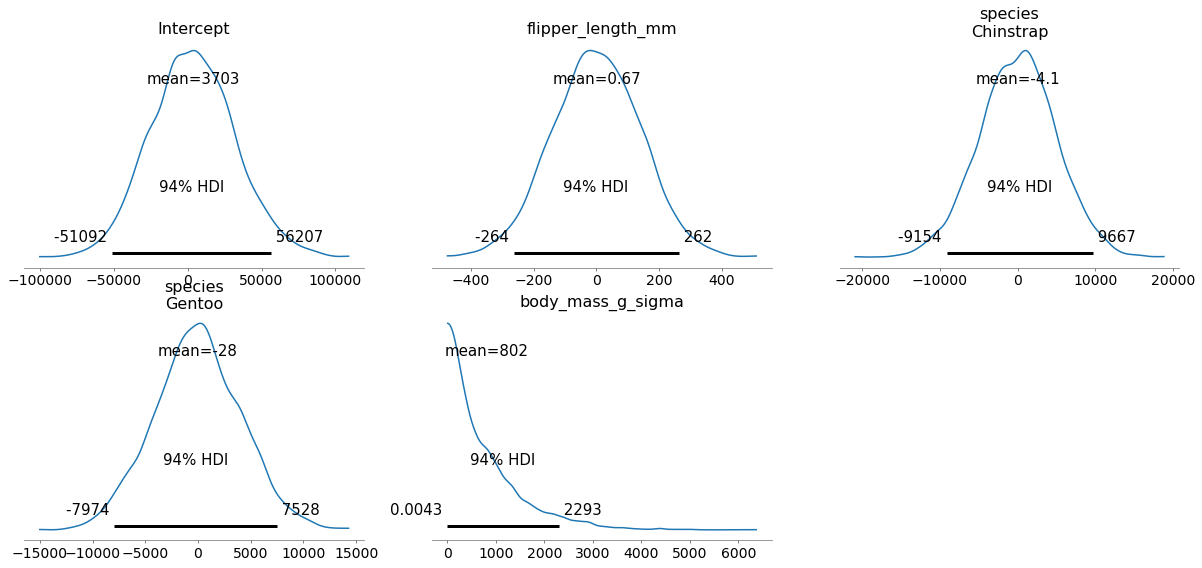

In [109]:
# Bambi by default gives a very narrow prior on sigma for this data, so i put my own in
sigma_prior = bmb.Prior('Exponential', lam= 1/800.)
model3 = bmb.Model('body_mass_g ~ flipper_length_mm + species', penguins_clean, priors={'sigma':sigma_prior})
model3.build()
model3.plot_priors();


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [Intercept, flipper_length_mm, species, body_mass_g_sigma]


/Users/ronaldlegere/opt/anaconda3/envs/BayesRules/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
/Users/ronaldlegere/opt/anaconda3/envs/BayesRules/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
/Users/ronaldlegere/opt/anaconda3/envs/BayesRules/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
/Users/ronaldlegere/opt/anaconda3/envs/BayesRules/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
Sampling 4 chains for 1_000 tune and 10_000 draw iterations (4_000 + 40_000 draws total) took 48 seconds.


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
Intercept,-4022.326,592.499,-5126.515,-2906.136,3.919,2.771,22836.0,26564.0,1.0
flipper_length_mm,40.658,3.115,34.767,46.442,0.021,0.015,22704.0,26102.0,1.0
species[Chinstrap],-206.181,58.187,-316.683,-97.773,0.316,0.225,33896.0,28212.0,1.0
species[Gentoo],268.213,96.592,87.846,450.606,0.652,0.467,21971.0,25290.0,1.0
body_mass_g_sigma,376.701,14.552,349.518,403.856,0.073,0.052,39571.0,28993.0,1.0


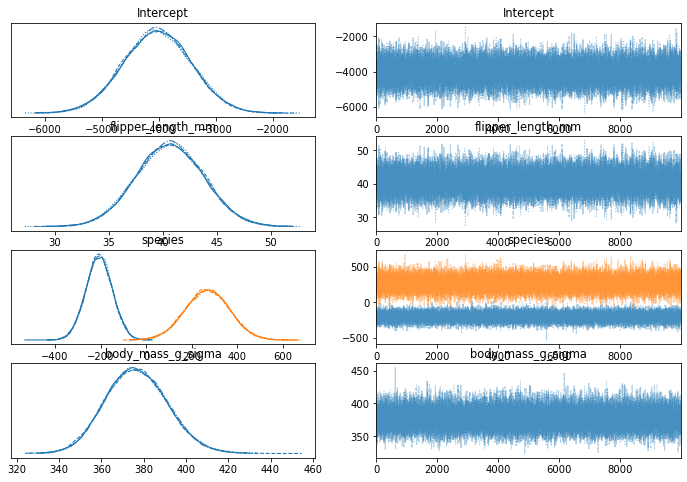

In [110]:
results3 = model3.fit(draws=10000, chains=4)
az.plot_trace(results3)
az.summary(results3)

I am sort of suprised at the large effect species has given that it really looks at first glance that flipper length should get most of the way there. 
However at a given flipper lenghth , the two speices do produce about a 200 gram correction (which is not a lot but still significant)

Now to look at the posterior prediction for a flipper length 197 adeile penguin

In [111]:
onePenguin = model3.predict(results3,kind = 'pps', data = pd.DataFrame({'species' : ['Adelie'], 'flipper_length_mm': [197.0]}), inplace = False)
samples = onePenguin.posterior_predictive.body_mass_g.values.flatten();
len(samples)

40000

<AxesSubplot:ylabel='Density'>

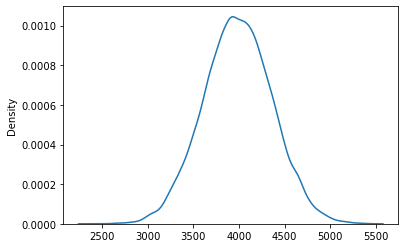

In [112]:
sns.kdeplot(samples)

In [38]:
pd.Series(samples).describe(percentiles=[.05,.50,.95])

count    40000.000000
mean      3986.147996
std        379.946924
min       2290.219195
5%        3359.306136
50%       3988.230411
95%       4612.111412
max       5623.675016
dtype: float64

## Exercise 10.11 Penguins! Interactions
Building from the previous exercise, our next goal is to model body_mass_g by flipper_length_mm and species with an interaction term between these two predictors.

a) use bambi to simulate posterior for model with interactions between the predictors

b) simulate and plot 50 posteriror model lines 

c) az.summary, any evidence that interaction terms are necessary? Explain reasoning.

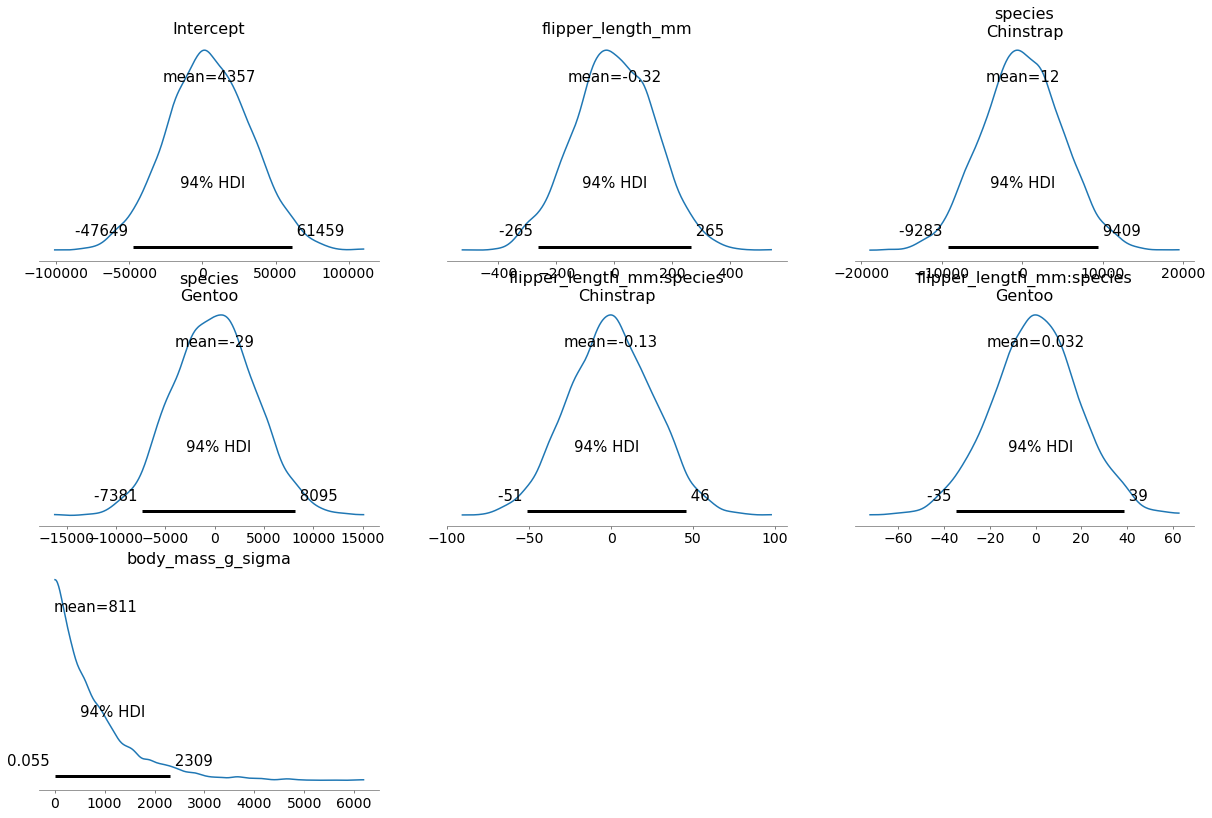

In [40]:
# Bambi by default gives a very narrow prior on sigma for this data, so i put my own in
sigma_prior = bmb.Prior('Exponential', lam= 1/800.)
model = bmb.Model('body_mass_g ~ flipper_length_mm*species', penguins_clean, priors={'sigma':sigma_prior})
model.build()
model.plot_priors();


In [ ]:
results = model.fit(draws=10000, chains=4)
az.plot_trace(results)

That takes several minutes to run...  lets look at the summary:

In [42]:
az.summary(results)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
Intercept,-2886.726,822.096,-4430.089,-1355.481,7.897,5.584,10845.0,13846.0,1.0
flipper_length_mm,34.677,4.324,26.665,42.869,0.042,0.029,10833.0,13941.0,1.0
species[Chinstrap],-141.882,1371.602,-2687.876,2463.624,13.177,9.318,10830.0,13889.0,1.0
species[Gentoo],-3365.159,1267.965,-5812.394,-1065.025,12.992,9.187,9524.0,12294.0,1.0
flipper_length_mm:species[Chinstrap],-0.146,7.065,-13.414,13.157,0.068,0.048,10726.0,14041.0,1.0
flipper_length_mm:species[Gentoo],17.481,6.155,6.215,29.269,0.064,0.045,9214.0,12257.0,1.0
body_mass_g_sigma,371.756,14.476,345.075,398.870,0.100,0.071,20870.0,16799.0,1.0


The interactions are not strong, but there is some evidence for a weak interaction with Gentoo species (note how the mean got pulled WAY down)

Lets plot 50 random lines, color coded by species.

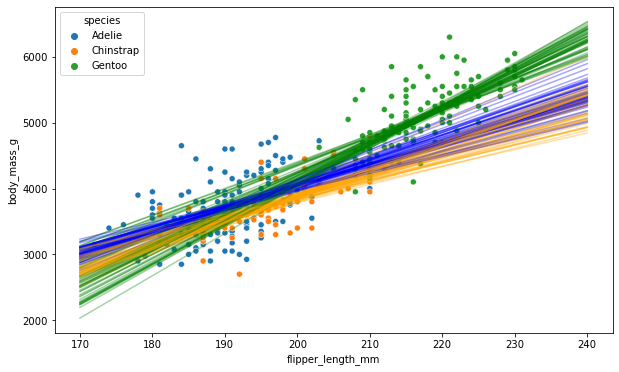

In [106]:
fig, ax= plt.subplots(1,1, figsize=(10,6))
xs = np.linspace(170,240,100)
sns.scatterplot(data = penguins_clean,ax = ax, x='flipper_length_mm', y ='body_mass_g', hue= 'species')
base_slopes = results.posterior.flipper_length_mm.values.flatten()
intercepts = results.posterior.Intercept.values.flatten()
species = results.posterior.species.values.reshape(-1,2)
slope_species = results.posterior['flipper_length_mm:species'].values.reshape(-1,2)
combined_data =  np.array(list(zip(base_slopes, slope_species, intercepts, species) ),dtype=object)
sample = np.random.choice(len(combined_data),replace=False, size = 50)
# plot each species
for (base_slope, slope_specie, intercept, specie) in combined_data[sample]:
    ax.plot(xs, base_slope*xs + intercept, color = 'blue',alpha = .35)
    ax.plot(xs, (base_slope+slope_specie[0])*xs + intercept + specie[0], color = 'orange',alpha = .35)
    ax.plot(xs, (base_slope+slope_specie[1])*xs + intercept + specie[1], color = 'green',alpha = .35)

From this we can see that the Gentoo slope is significantly different , but the other two are about the same. However it doesnt actually make much difference since the other two dont have flipper lengths that are long enough to reach into the region where the lines are very different.

## Exercise 10.12 Penguins! 3 Predictors
Next, let’s explore a model of body_mass_g by three predictors: flipper_length_mm, bill_length_mm, and bill_depth_mm. Do not use any interactions in this model.

a) Use bambi to simulate the posterior for this model.

b) Produce 95% credible intervals for the model parameters. (az.summary i think does this)

c) Based on these 95% credible intervals, when controlling for the other predictors in the model, which predictors have a significant positive association with body mass, which have significant negative association with body mass, and which have no significant association?

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [Intercept, flipper_length_mm, culmen_length_mm, culmen_depth_mm, body_mass_g_sigma]


/Users/ronaldlegere/opt/anaconda3/envs/BayesRules/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
/Users/ronaldlegere/opt/anaconda3/envs/BayesRules/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
/Users/ronaldlegere/opt/anaconda3/envs/BayesRules/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
/Users/ronaldlegere/opt/anaconda3/envs/BayesRules/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
Sampling 4 chains for 1_000 tune and 10_000 draw iterations (4_000 + 40_000 draws total) took 45 seconds.


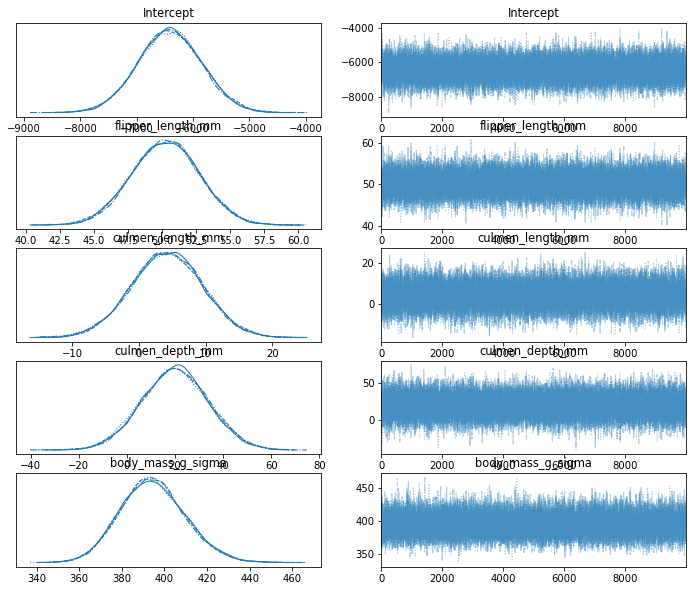

In [125]:
# Bambi by default gives a very narrow prior on sigma for this data, so i put my own in
sigma_prior = bmb.Prior('Exponential', lam= 1/800.)
model4 = bmb.Model('body_mass_g ~ flipper_length_mm + culmen_length_mm + culmen_depth_mm', penguins_clean, priors={'sigma':sigma_prior})
results4 = model4.fit(draws=10000, chains=4)
az.plot_trace(results4);

In [140]:
az.summary(results4,hdi_prob = .95,stat_funcs = {'2.5%' :lambda x: np.quantile(x,.025),'97.5%' :lambda x: np.quantile(x,.975)})

,mean,sd,hdi_2.5%,hdi_97.5%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat,2.5%,97.5%
Intercept,-6415.542,564.228,-7525.988,-5312.452,3.104,2.195,33045.0,31078.0,1.0,-7520.609,-5303.954
flipper_length_mm,50.234,2.482,45.373,55.029,0.014,0.010,29833.0,29733.0,1.0,45.404,55.069
culmen_length_mm,4.176,5.325,-6.373,14.464,0.029,0.022,33168.0,30239.0,1.0,-6.321,14.530
culmen_depth_mm,19.895,13.790,-7.248,46.393,0.075,0.054,34084.0,30603.0,1.0,-6.959,46.708
body_mass_g_sigma,394.567,15.203,366.066,425.446,0.075,0.053,41567.0,31018.0,1.0,366.365,425.883


Based on this we can see that flipper length has a strong positive association,  bill length has a weak positive association, and bill depth also has a week positive association.  

## Exercise 10.13

Consider 4 separate models of body_mass_g:

1. body_mass_g ~ flipper_length_mm

2. body_mass_g ~ species

3. body_mass_g ~ flipper_length_mm + species (results3 above)

4. body_mass_g ~ flipper_length_mm + bill_length_mm + bill_depth_mm (results4 above)



a) Simulate these four models using the  bambi function.

b) Produce and compare the az.plot_ppc() plots for the four models. 
 
c) Evaluate and compare the ELPD posterior predictive accuracy of the four models. (az.compare) (uses loocv)

In summary, which of these four models is “best?” Explain.

In [128]:
sigma_prior = bmb.Prior('Exponential', lam= 1/800.)
model1 = bmb.Model('body_mass_g ~ flipper_length_mm', penguins_clean, priors={'sigma':sigma_prior})
results1 = model1.fit(draws=10000, chains=4)
az.summary(results1)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [Intercept, flipper_length_mm, body_mass_g_sigma]


/Users/ronaldlegere/opt/anaconda3/envs/BayesRules/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
/Users/ronaldlegere/opt/anaconda3/envs/BayesRules/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
/Users/ronaldlegere/opt/anaconda3/envs/BayesRules/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
Sampling 4 chains for 1_000 tune and 10_000 draw iterations (4_000 + 40_000 draws total) took 30 seconds.


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
Intercept,-5777.659,306.798,-6346.438,-5195.824,1.247,0.882,60596.0,30242.0,1.0
flipper_length_mm,49.670,1.523,46.826,52.534,0.006,0.004,60287.0,29931.0,1.0
body_mass_g_sigma,395.445,15.194,368.251,424.950,0.062,0.044,59961.0,31398.0,1.0


In [129]:
sigma_prior = bmb.Prior('Exponential', lam= 1/800.)
model2 = bmb.Model('body_mass_g ~ species', penguins_clean, priors={'sigma':sigma_prior})
results2 = model2.fit(draws=10000, chains=4)
az.summary(results2)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [Intercept, species, body_mass_g_sigma]


/Users/ronaldlegere/opt/anaconda3/envs/BayesRules/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
/Users/ronaldlegere/opt/anaconda3/envs/BayesRules/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
/Users/ronaldlegere/opt/anaconda3/envs/BayesRules/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
Sampling 4 chains for 1_000 tune and 10_000 draw iterations (4_000 + 40_000 draws total) took 34 seconds.


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
Intercept,3700.731,37.353,3629.060,3769.324,0.179,0.126,43721.0,32866.0,1.0
species[Chinstrap],32.540,66.946,-94.991,157.010,0.321,0.275,43424.0,33740.0,1.0
species[Gentoo],1375.574,55.595,1271.833,1481.581,0.262,0.185,45173.0,34110.0,1.0
body_mass_g_sigma,463.589,17.844,430.347,497.238,0.076,0.054,55807.0,33474.0,1.0


In [131]:
model1.predict(results1, kind='pps')
model2.predict(results2, kind='pps')
model3.predict(results3, kind='pps')
model4.predict(results4, kind='pps')

here are the ppc plots, not convinced anything strong can be concluded. Those that do not include species (model 1 and 4)  do not capture the structure as well though,but perhaps do better then expected since long flippers is quite predictive of "Gentoo" species.

<AxesSubplot:xlabel='body_mass_g / body_mass_g'>

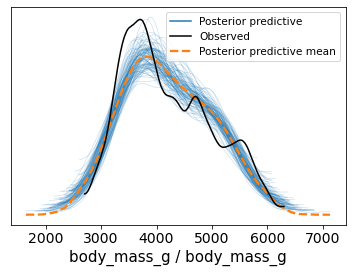

In [150]:
az.plot_ppc(results1, num_pp_samples=100)

<AxesSubplot:xlabel='body_mass_g / body_mass_g'>

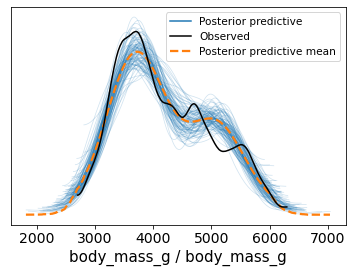

In [151]:
az.plot_ppc(results2, num_pp_samples=100)

<AxesSubplot:xlabel='body_mass_g / body_mass_g'>

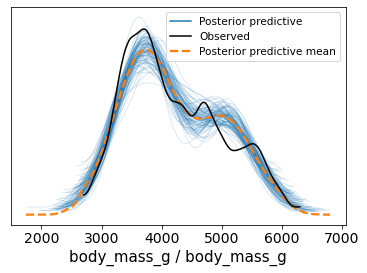

In [152]:
az.plot_ppc(results3, num_pp_samples=100)

<AxesSubplot:xlabel='body_mass_g / body_mass_g'>

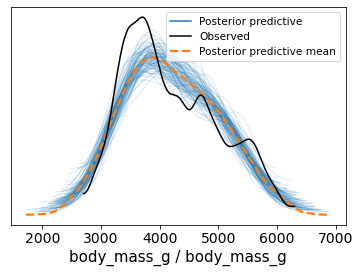

In [153]:
az.plot_ppc(results4, num_pp_samples=100)

In [139]:
 az.compare({'model1':results1, 'model2':results2, 'model3' : results3, 'model4':results4})

,rank,loo,p_loo,d_loo,weight,se,dse,warning,loo_scale
model3,0,-2515.636602,4.614151,0.000000,9.063643e-01,12.869067,0.000000,False,log
model1,1,-2531.388986,2.885455,15.752383,1.183844e-14,13.189424,5.089843,False,log
model4,2,-2531.558545,4.673148,15.921943,9.363574e-02,13.301619,6.430900,False,log
model2,3,-2586.126687,3.556451,70.490084,1.998401e-15,11.369069,9.731524,False,log


Looking at this, the best model is `model3`, the one we started with. `model1` has the same score as `model4`, which I find suspicious but I double checked and they are doing the right ones.. `model2`,  which just uses species, doesnt do as well but that is no suprise.   I think i would chose either `model1` , which is the simplest possible (just uses fillper length) OR model3 which adds in species with some benefit.   I would not use `model4` because it does no better but is clearly more complicated!